In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt
import cv2
import shutil
import os
import zipfile


CATEGORIES = ['Cat', 'Dog']

DATA_DIR = '/kaggle/working/train'
BASE_DIR = '/kaggle/working/cats_and_dogs'

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')

TRAIN_CATS_DIR = os.path.join(TRAIN_DIR, 'cats')
TRAIN_DOGS_DIR = os.path.join(TRAIN_DIR, 'dogs')

TEST_CATS_DIR = os.path.join(TEST_DIR, 'cats')
TEST_DOGS_DIR = os.path.join(TEST_DIR, 'dogs')

VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, 'cats')
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, 'dogs')

Data preparing:

In [9]:
START_DATA_DIR = '/kaggle/input/dogs-vs-cats-redux-kernels-edition'

with zipfile.ZipFile(os.path.join(START_DATA_DIR, 'train.zip'), 'r') as z:
    z.extractall('/kaggle/working')

os.mkdir(BASE_DIR)
os.mkdir(TRAIN_DIR)
os.mkdir(TEST_DIR)
os.mkdir(VALIDATION_DIR)

os.mkdir(TRAIN_CATS_DIR)
os.mkdir(TRAIN_DOGS_DIR)

os.mkdir(TEST_CATS_DIR)
os.mkdir(TEST_DOGS_DIR)

os.mkdir(VALIDATION_CATS_DIR)
os.mkdir(VALIDATION_DOGS_DIR)


cats_images = ['cat.{}.jpg'.format(i) for i in range(5000)]
for image in cats_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(TRAIN_CATS_DIR, image)
    shutil.copyfile(fr, to)

cats_images = ['cat.{}.jpg'.format(i) for i in range(5000, 10000)]
for image in cats_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(VALIDATION_CATS_DIR, image)
    shutil.copyfile(fr, to)
    
cats_images = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for image in cats_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(TEST_CATS_DIR, image)
    shutil.copyfile(fr, to)
    
    
    
    
dogs_images = ['dog.{}.jpg'.format(i) for i in range(5000)]
for image in dogs_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(TRAIN_DOGS_DIR, image)
    shutil.copyfile(fr, to)

dogs_images = ['dog.{}.jpg'.format(i) for i in range(5000, 10000)]
for image in dogs_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(VALIDATION_DOGS_DIR, image)
    shutil.copyfile(fr, to)
    
dogs_images = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for image in dogs_images:
    fr = os.path.join(DATA_DIR, image)
    to = os.path.join(TEST_DOGS_DIR, image)
    shutil.copyfile(fr, to)
    

In [10]:
train_generator = ImageDataGenerator(
    rescale = 1. / 255,
).flow_from_directory(
    TRAIN_DIR,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

validation_generator = ImageDataGenerator(
    rescale = 1. / 255,
).flow_from_directory(
    TEST_DIR,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

Found 10000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Building model:

In [68]:
conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = False
conv_base.summary()

model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss = losses.binary_crossentropy,
    optimizer = optimizers.RMSprop(lr=0.001),
    metrics = ['accuracy'],
)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    epochs = 30,
)

model.save('cats_and_dogs.h5')

Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 10s 100ms/step - loss: 0.0935 - accuracy: 0.9620 - val_loss: 0.3186 - val_accuracy: 0.9160
Epoch 2/30
100/100 [==============================] - 10s 99ms/step - loss: 0.1001 - accuracy: 0.9615 - val_loss: 0.3396 - val_accuracy: 0.9040
Epoch 3/30
100/100 [==============================] - 10s 100ms/step - loss: 0.0772 - accuracy: 0.9700 - val_loss: 0.4979 - val_accuracy: 0.8680
Epoch 4/30
100/100 [==============================] - 10s 100ms/step - loss: 0.0855 - accuracy: 0.9675 - val_loss: 0.3663 - val_accuracy: 0.9120
Epoch 5/30
100/100 [==============================] - 10s 102ms/step - loss: 0.0885 - accuracy: 0.9680 - val_loss: 0.5477 - val_accuracy: 0.8710
Epoch 6/30
100/100 [==============================] - 11s 105ms/step - loss: 0.0866 - accuracy: 0.9700 - val_loss: 0.4286 - val_accuracy: 0.9000
Epoch 7/30
100/100 [==============================] - 10s 100ms/step - loss: 0.0651 - ac

Testing model:

In [59]:
model.load_weights('cats_and_dogs.h5')
_, accuracy = model.evaluate_generator(validation_generator)
print('Accuracy: ', str(round(accuracy * 100, 2)), '%')
    

Accuracy:  90.56 %


Dog


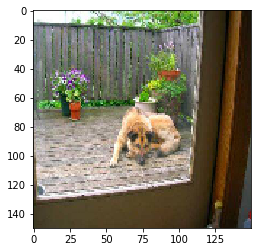

In [67]:
for img in validation_generator:
    image = img[0]
    label = img[1]
    break    

index = 0
model_prediction = CATEGORIES[int(round(model.predict(image)[index][0]))]
plt.imshow(image[index])
print(model_prediction)